### Описание признаков
- id_0 - порядковый номер в полученном датасете 
- id - предположительно, порядковый номер в исходном датасете, который потом был разбит на части, одной из которых стал полученный нами датасет
- atm_group - банковская группа, которой принадлежит банкомат
- address - адрес банкомата в транслитерации
- addres_rus - адрес банкомата на русском
- lat, long - широта и долгота, координаты расположения банкомата на карте 
- target - целевая переменная, индекс популярности места для расположения банкомата
- элементы адреса, полученны в результате анализа исходного адреса или координат банкомата: 
    - federal_district - федеральный округ РФ
    - region_with_type - субъект РФ
    - area_with_type - муниципальный район или городской округ в составе субъекта РФ
    - city_with_type - город
    - city_area - административный округ города (для г.Москва)
    - city_district_with_type - район города
    - settlement_with_type - сельское поселение (в составе муниципального района или городского округа)
    - street_with_type - улица
    - house - номер дома
- capital_marker - признак столицы региона или города федерального значения
    - 1 — центр района (Московская обл, Одинцовский р-н, г Одинцово)
    - 2 — центр региона (Новосибирская обл, г Новосибирск)
    - 3 — центр района и региона (Томская обл, г Томск)
    - 4 — центральный район региона (Тюменская обл, Тюменский р-н)
    - 0 — ничего из перечисленного (Московская обл, г Балашиха)
- данные о ближайших станциях и линиях метро: 
    - nearest_metro_distance - расстояние до ближайшего метро
    - metro_station_name_{N}, metro_line_name_{N}, metro_distance_{N} - наименование станции, ветки и расстояния до станции метро N (N - не более 3)
- locality_area - площадь города, в котором расположен банкомат (в кв.км)
- locality_population - население города, в котором расположен банкомат (количество человек)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('datasets/train.csv')
df.head(5)

,id_0,id,atm_group,address,address_rus,lat,long,target,federal_district,region_with_type,...,metro_line_name_1,metro_distance_1,metro_station_name_2,metro_line_name_2,metro_distance_2,metro_station_name_3,metro_line_name_3,metro_distance_3,locality_area,locality_population
0,2606,5.0,496.5,BUDENNOGO 7A ELISTA,"улица С.М. Будённого, 7А, Элиста, Республика К...",46.318213,44.260407,0.019958,Южный,Респ Калмыкия,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.376920,103122.0
1,2607,6.0,496.5,"HO CHI MIHN AVE, 19 ULYANOVSK","г Ульяновск, пр-кт Хо Ши Мина, д 19",54.270398,48.300632,-0.089111,Приволжский,Ульяновская обл,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,326.723424,627705.0
2,5126,7.0,496.5,SHELESTA 116A KHABAROVSK,"улица Шелеста, 116А, Хабаровск, Россия, 680042",48.520503,135.052576,-0.048769,Дальневосточный,Хабаровский край,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,389.085968,616372.0
3,2608,8.0,496.5,ORDZHONIKIDZE 52 YAKUTSK,"улица Орджоникидзе, 52, Якутск, Республика Сах...",62.025583,129.721362,-0.041545,Дальневосточный,Респ Саха /Якутия/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.141162,322987.0
4,2609,10.0,496.5,"VETERANOV AVE, 3 KRASNOKAMENS","проспект Ветеранов, 11, Краснокаменск, Забайка...",50.089050,118.027310,0.025479,Дальневосточный,Забайкальский край,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.359358,51387.0


In [5]:
df.shape

(6261, 30)

Проанализируем значения признаков в датасете, разбив их на три группы:
- **группа 1** - признаки, которые были в исходном датасете (кроме адреса банкомата), а также площадь и население города
- **группа 2** -признаки с адресом банкомата и его составляющими
- **группа 3** -признаки с данными о ближайших станциях метро

### 1. Анализ признаков группы 1: координаты банкомата, банковская группа, население и площадь города расположения, целевая переменная

Сформируем датафрейм с указанными столбцами и выполним его анализ 

In [2]:
gr1_col_list = ['atm_group', 'lat', 'long', 'target', 'capital_marker', 'locality_area', 'locality_population']  
df1 = df[gr1_col_list]
# pd.set_option('display.float_format', lambda x: '%.5f' % x)
corr = df1.corr()
description = df1.describe(include='all')
description['locality_population'] = description['locality_population'].apply("{0:.5f}".format)
description['locality_area'] = description['locality_area'].apply("{0:.5f}".format)
description

,atm_group,lat,long,target,capital_marker,locality_area,locality_population
count,6261.000000,6260.000000,6260.000000,6261.000000,6218.000000,6172.00000,6172.00000
mean,4417.937230,54.177808,63.153944,0.000715,1.188807,10028.66557,2001685.05379
std,2430.413287,4.343197,32.939316,0.085852,0.932527,117529.06322,3747912.09215
min,32.000000,42.057080,19.941530,-0.145001,0.000000,0.00000,0.00000
25%,1942.000000,52.259965,37.768561,-0.061176,0.000000,75.59791,200636.00000
50%,5478.000000,55.112968,48.396165,-0.015573,2.000000,240.72413,576624.00000
75%,5478.000000,56.122756,84.944037,0.040149,2.000000,504.61807,1156659.00000
max,8083.000000,69.491912,173.706490,0.218608,4.000000,3233241.98836,12678079.00000


По результатам описания параметров можно предварительно сделать следующие заключения: 
- в столбцах atm_group и target пропусков нет
- в столбцах lat и lon пропущено одно значение (видимо, для одного банкомата отсутствуют координаты)
- в столбцах locality_area и locality_population: 
  - есть ~ 100 пропусков
  - есть нулевые значения, что не очень логично, т.к. население и площадь населенного пункта не могут быть нулевой
  - максимальное значение количества населения выглядит правдоподобно (очевидно, это Москва с ее ~ 12 милионным населением), а вот максимальная площад в ~3 миллиона кв.км. не очень похожа на площадь города и требует отдельного внимания

Поля capital_marker и atm_group, хоть и численные, на самом деле являются категориальными признаками, на что мы подробнее посмотрим ниже.

Проведем дополнительные анализ указанных признаков

#### 1.1 Банковская группа (atm_group)

In [12]:
df1['atm_group'].unique()

array([ 496.5, 1022. ,   32. , 1942. , 3185.5, 8083. , 5478. ])

Взяв уникальные значения признака, видим, что их всего 7 штук. Видимо, это числовые представления каких-то банков или групп банков, к которым относятся банкоматы. Построим гистограмму, показывающую количество банкоматов каждой группы в выборке.

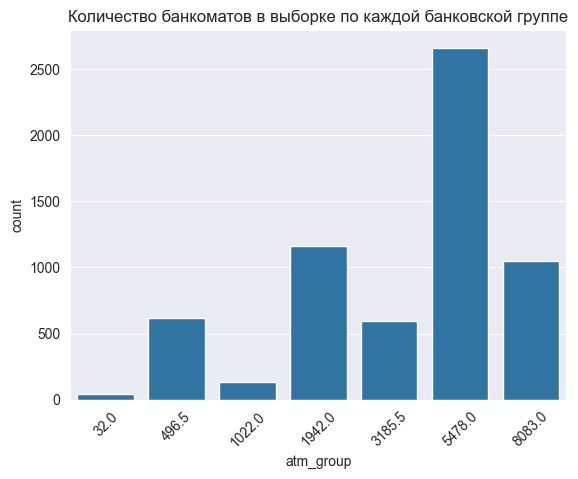

In [15]:
sns.countplot(data=df1, x='atm_group')
plt.xticks(rotation=45)
plt.title('Количество банкоматов в выборке по каждой банковской группе')
plt.show()

Видим, что количество данных о бакоматах для каждой группы неодинаково. 

#### 1.2 Координаты банкомата
Посмотрим на распределения координат банкомата

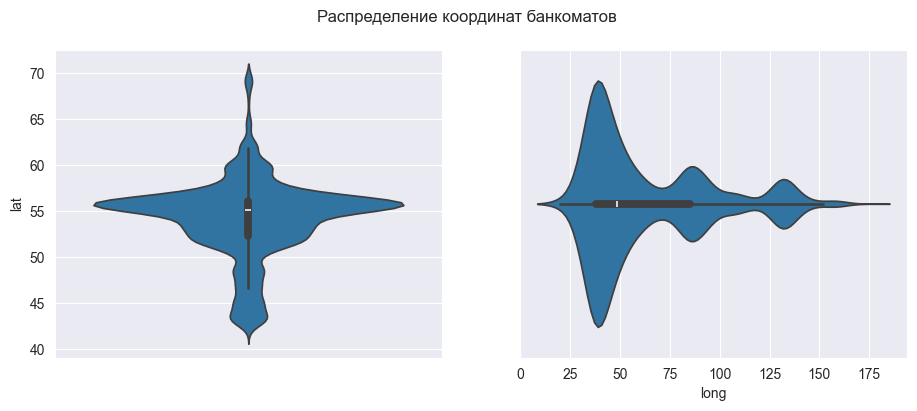

In [31]:
fig, ax1= plt.subplots(1, 2, figsize= (11, 4))
sns.violinplot(y="lat", data= df1, ax= ax1[0])
plt.suptitle("Распределение координат банкоматов")
sns.violinplot(x="long", data= df1, ax= ax1[1])
plt.show()

Видим, что основные значения широты находятся в окрестности 55, а основные значения долготы в окрестносях 30, 80 и 130, что примерно соответствует расположениею основных населенных пунктов на территории РФ

К сожалению, значения координат не являются мерой какой-либо характеристики банкомата и просто отражают его местоположения на карте, поэтому вряд ли могут быть полезны в линейных моделях 

#### 1.3 Уровень населенного пункта (capital_marker)
Как и atm_group, capital_marker на самом деле является категориальным признаком с возможными значениями от 0 до 4. Посмотрим количество банкоматов в выборки в зависимости от этого признака.  

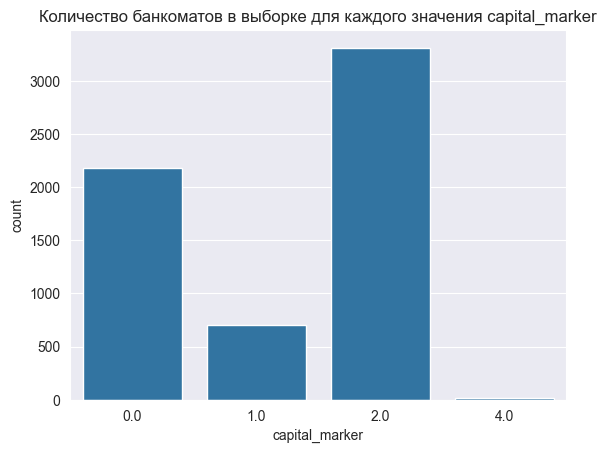

In [23]:
sns.countplot(data=df1, x='capital_marker')
plt.title('Количество банкоматов в выборке для каждого значения capital_marker')
plt.show()

Видим, что распределение количества банкоматов в выборке по значениям признака неравномерно. Основная часть записей приходится на значения 0, 1 и 2. А максимум - на 2. 
Можно предположить, что целевая переменная зависит от данного признака, т.к. он говорит о том, насколько велик город и каков его статус. Посмотрим на эту взаимосвязь чуть ниже 


#### 1.4 Площадь и население города расположения банкомата (locality_area и locality_population)
Посмотрим на распределение признаков 

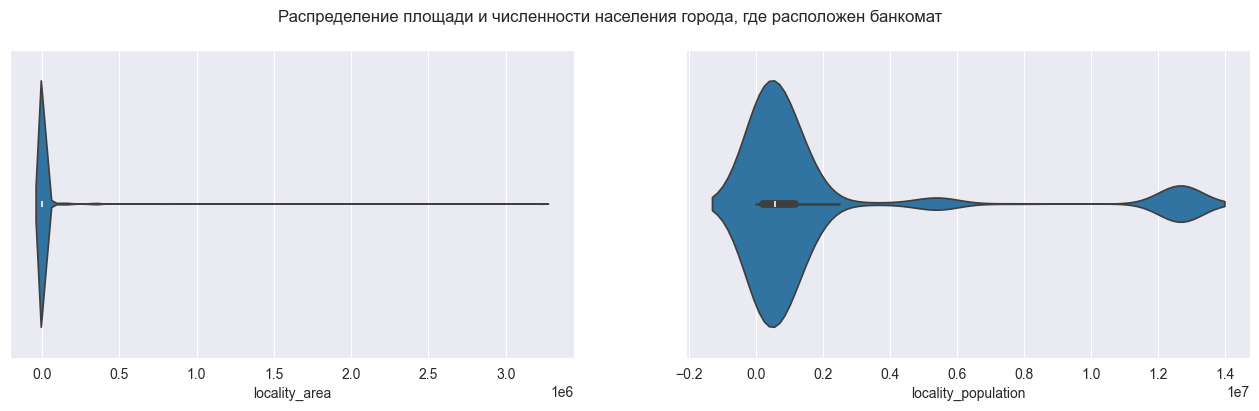

In [42]:
fig, ax1= plt.subplots(1, 2, figsize= (16, 4))
sns.violinplot(x="locality_area", data= df1, ax= ax1[0])
plt.suptitle("Распределение площади и численности населения города, где расположен банкомат")
sns.violinplot(x="locality_population", data= df1, ax= ax1[1])
plt.show()

Распределение населения в целом реалистично: мы видим, что основная часть данных приходятся города с численностью населения до 1 миллиона человек. Кроме того, мы видим два всплеска на отметках ~ 5 млн.чел. (это Санкт-Петербург) и ~12 млн.чел. (это Москва)

А вот распределение площади выглядит странным. Скорее всего, это связано с наличием в данных значений площади, не соответствующих площади городов. Учитывая, что самый большой город в РФ - это Москва (~ 2500 кв.вм), построим распределение значений признака, убрав из них значения, превышающие 3000 кв.км.

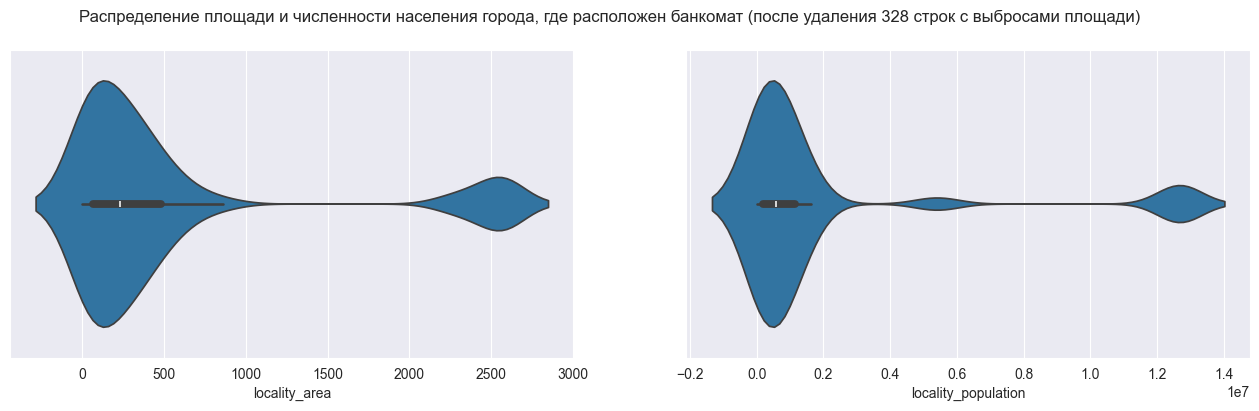

In [56]:
cleaned_by_locality_area = df1[df1['locality_area'] < 3000] 
deleted_row_count = df1.shape[0] - cleaned_by_locality_area.shape[0]
fig, ax1= plt.subplots(1, 2, figsize= (16, 4))
sns.violinplot(x="locality_area", data= cleaned_by_locality_area, ax= ax1[0])
plt.suptitle(f"Распределение площади и численности населения города, где расположен банкомат "
             f"(после удаления {deleted_row_count} строк с выбросами площади)")
sns.violinplot(x="locality_population", data= cleaned_by_locality_area, ax= ax1[1])
plt.show()

Видим, что после удаления строк, для которых площадь населенного пункта была больше 3000 кв.м. (таких строк - 328) распределение площади стало более правдоподобным

Также выше мы указывали, что в выборке есть записи и с нулевым значением площади и численности населения. Посмотрим, сколько таких записей. 

In [54]:
print('Количество строк с нулевой площадью: ', df1[df1['locality_area'] == 0].shape[0])
print('Количество строк с нулевой численностью населения: ', df1[df1['locality_population'] == 0].shape[0])

Количество строк с нулевой площадью:  470
Количество строк с нулевой численностью населения:  5


Видим, что в данных довольно много ошибочных значений (328 аномально больших и 470 нулевых площадей; 5 значений с 0 в качестве численности населения). Причинами таких данных может быть: 
- отсутствие данных о численности населения и площади населенного пункта в сервисе, используемом для получения этих данных. В этом случае можно попытаться найти и заполнить значения вручную. 
- ошибочное получение данных о площади и численности населения не для населенного пункта, а, например, для региона, в котором он находится. В этом случае нужно поискать ошибки в работе алгоритма наполнения данными. 

#### 1.5 Целевая переменная (target)
Посмотрим на распределение целевой переменной

In [59]:
df['target'].describe()

count    6261.000000
mean        0.000715
std         0.085852
min        -0.145001
25%        -0.061176
50%        -0.015573
75%         0.040149
max         0.218608
Name: target, dtype: float64

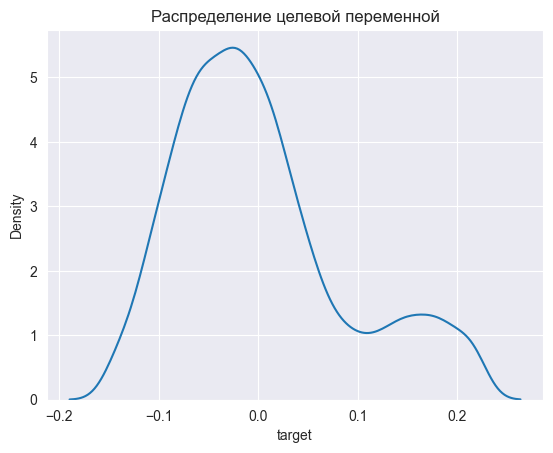

In [61]:
sns.kdeplot(x="target", data= df1, )
plt.title("Распределение целевой переменной")
plt.show()

#### 1.6 Анализ зависимостей признаков
Вычислим попарные коэффициенты корреляции признаков и отобразим их на диаграмме

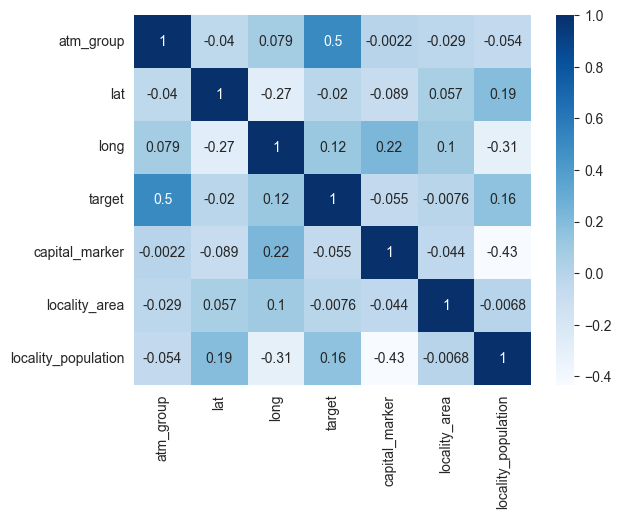

In [10]:
sns.heatmap(df1.corr(), cmap="Blues", annot=True)
plt.show()

На основе полученных значений можно заметить, что: 
- коэффициент корреляции между целевой переменной и признаком atm_group равен 0.5. И хотя atm_group по сути категориальный признак, его значение может отражать какую-то характеристику банковской группы и, соответственно, влиять на значение целевой переменно. Можно предположить, что значение признака atm_group можно будет использовать при реализации моделей машинного обучения;
- целевой коэффициент также может иметь некоторую зависимость от признака locality_population, что может быть связано с тем, что в густонаселенных городах банкоматы пользуются чуть большей популярностью; 
- целевой коэффициент также может иметь зависимость от признака long, которую трудно объяснить

Кроме того: 
- наблюдается зависимость признаков lat и long, которая может объясняться особенностью расположения городов на территории РФ
- можно предположить зависимость признака localoty_population от long, которая может объясняться тем, что более населенные города находятся на территории РФ западнее
- также можно предположить зависимость признака localoty_population от capital_marker, что может объясняться тем, что более высокие значения capital_marker соответствуют более крупным, а следовательно и более густонаселенным городам   

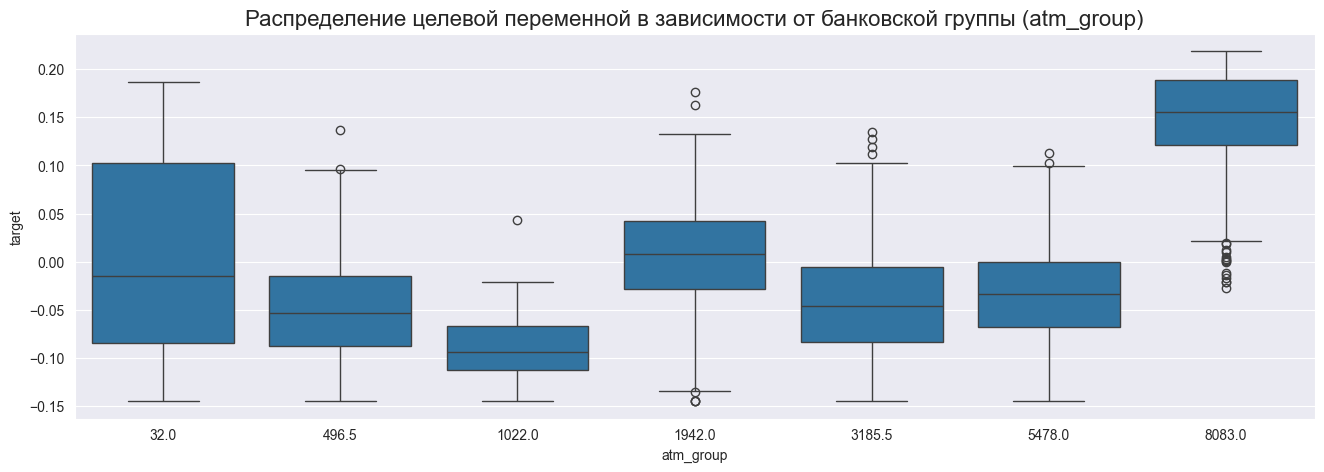

In [3]:
plt.figure(figsize= (16, 5))
plt.grid(True)
sns.boxplot(data= df, x='atm_group', y= "target")

plt.title("Распределение целевой переменной в зависимости от банковской группы (atm_group)", fontdict= {'fontsize': 16})
plt.show()

### Адреса банкоматов

### Ближайшие станции метро

<Axes: >

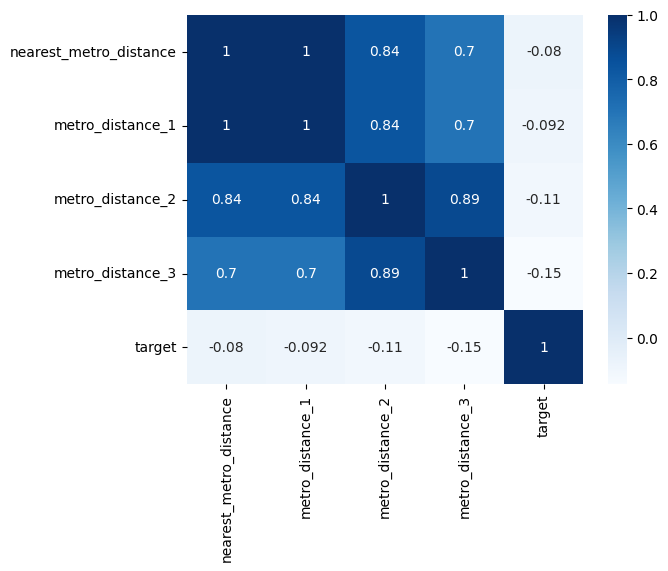

In [18]:
gr3_col_list = ['nearest_metro_distance',
     'metro_distance_1', 
    'metro_distance_2', 
    'metro_distance_3', 'target']
df3 = df[gr3_col_list]
corr = df3.corr()

import seaborn as sns
sns.heatmap(corr, cmap="Blues", annot=True)